# Decision Tree & Random Forest LAB

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step I: Upload Data 

In [58]:
data = pd.read_csv('Internautes_info.csv')
print(data)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [59]:
#Informations générales sur le dataset:
print('Les dimensions du dataset sont:', data.shape)
print('Les informations sur le dataset sont:')
print(data.info)
print('Une description du dataset présente:')
print(data.describe())


Les dimensions du dataset sont: (400, 5)
Les informations sur le dataset sont:
<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>
Une description du dataset présente:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500

# Step II: Data Preparation

In [60]:
# Vérifier s'il y a des valeurs manquantes
missing_values = data.isnull().sum()
print(missing_values)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [61]:
#Vérification du type de données avant l'encodage
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder 
# Convertir les données catégorielles (Gender) en numériques
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
print(data)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [63]:
from sklearn.preprocessing import StandardScaler
# Normaliser les caractéristiques (Age, EstimatedSalary)
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])
print(data)


      User ID  Gender       Age  EstimatedSalary  Purchased
0    15624510       1 -1.781797        -1.490046          0
1    15810944       1 -0.253587        -1.460681          0
2    15668575       0 -1.113206        -0.785290          0
3    15603246       0 -1.017692        -0.374182          0
4    15804002       1 -1.781797         0.183751          0
..        ...     ...       ...              ...        ...
395  15691863       0  0.797057        -0.844019          1
396  15706071       1  1.274623        -1.372587          1
397  15654296       0  1.179110        -1.460681          1
398  15755018       1 -0.158074        -1.078938          0
399  15594041       0  1.083596        -0.990844          1

[400 rows x 5 columns]


# Step III: Data Modelisation

In [64]:
# Division des données en variables inputs (X) et variable de sortie Y
X = data.drop('Purchased', axis=1)
y = data['Purchased']


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Preparer le x_train et y_train, et x_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

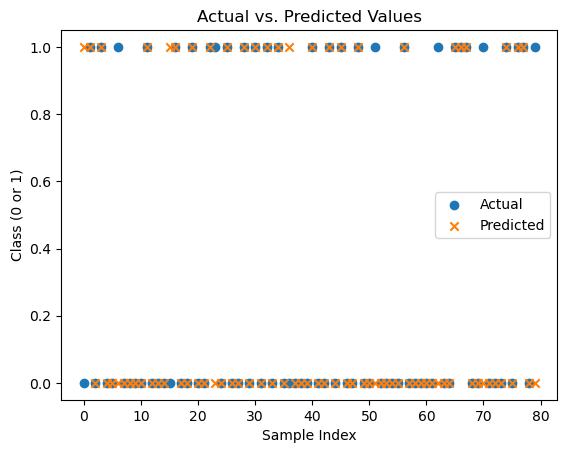

In [66]:
# Prédire avec le test set
y_pred = dt_classifier.predict(X_test)
# Visualiser les prédictions
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluer le modèle
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[49  3]
 [ 6 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



In [68]:
# Importance des features (numérique)
feature_importance = dt_classifier.feature_importances_
print("\nImportance des features (numérique):")
print(feature_importance)


Importance des features (numérique):
[0.12123709 0.01581248 0.43464035 0.42831008]


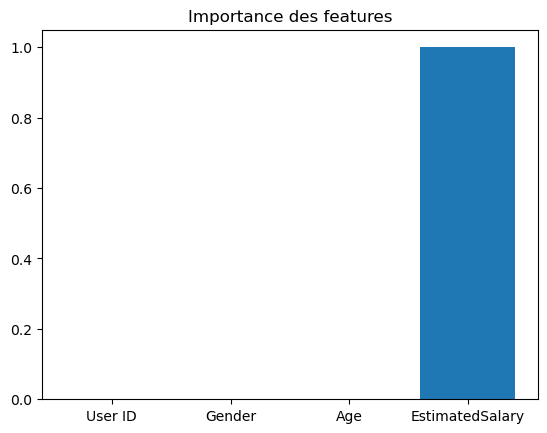

In [41]:
# Importance des features (graphique)
plt.bar(X.columns, feature_importance)
plt.title('Importance des features')
plt.show()

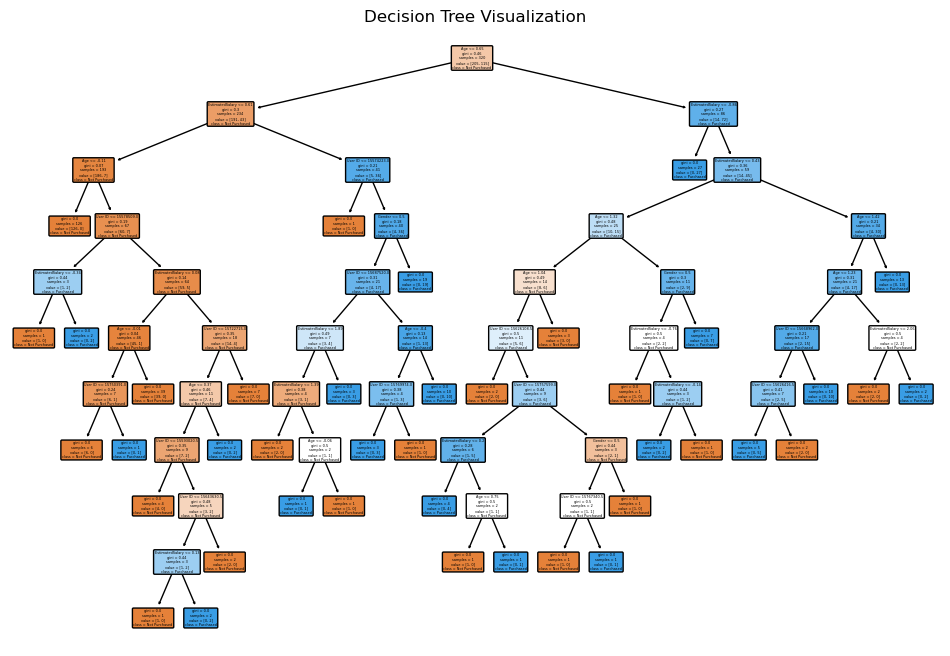

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Affichage graphique de l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], rounded=True, precision=2)
plt.title('Decision Tree Visualization')
plt.show()

In [71]:
#Affichage de l'arbre de décision sous forme de règles
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print("\n Arbre de décision sous forme de règles:")
print(tree_rules)


 Arbre de décision sous forme de règles:
|--- Age <= 0.65
|   |--- EstimatedSalary <= 0.61
|   |   |--- Age <= -0.11
|   |   |   |--- class: 0
|   |   |--- Age >  -0.11
|   |   |   |--- User ID <= 15578509.00
|   |   |   |   |--- EstimatedSalary <= -0.34
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EstimatedSalary >  -0.34
|   |   |   |   |   |--- class: 1
|   |   |   |--- User ID >  15578509.00
|   |   |   |   |--- EstimatedSalary <= 0.08
|   |   |   |   |   |--- Age <= -0.01
|   |   |   |   |   |   |--- User ID <= 15750391.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- User ID >  15750391.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  -0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- EstimatedSalary >  0.08
|   |   |   |   |   |--- User ID <= 15722715.00
|   |   |   |   |   |   |--- Age <= 0.37
|   |   |   |   |   |   |   |--- User ID <= 15593020.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |  

In [73]:
#Recheche des hyperparamètres optimaux
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
}

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres pour Decision Tree:", grid_search.best_params_)

# Créer le modèle Decision Tree
dt_model = DecisionTreeClassifier()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)


Meilleurs hyperparamètres pour Decision Tree: {'criterion': 'gini', 'max_depth': 1}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [79]:
# Random Forest avec les hyperparamètres de choix
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [82]:
# Evaluation du Random Forest
y_pred_rf = rf_classifier.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nMatrice de confusion Random Forest:\n", conf_matrix_rf)
print("\nClassification Report Random Forest:\n", class_report_rf)



Matrice de confusion Random Forest:
 [[47  5]
 [ 2 26]]

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



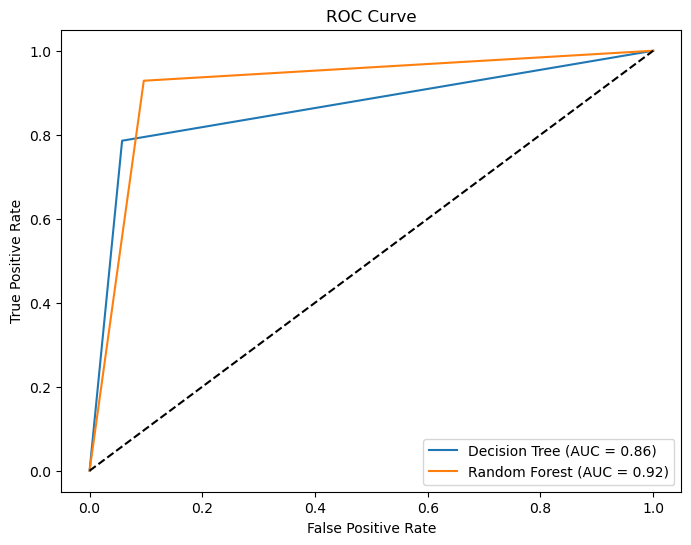

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# Comparaison entre les deux modèles (Decision tree et Random forest) en utilisant la courbe ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

auc_dt = roc_auc_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()